# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# # plot the histograms
# plt.figure(figsize=(9,3))
# plt.hist(x1, normed=True, bins=20, alpha=0.5)
# plt.hist(x2, normed=True, bins=20, alpha=0.5)
# plt.hist(x3, normed=True, bins=20, alpha=0.5)
# plt.hist(x4, normed=True, bins=20, alpha=0.5);
# plt.axis([-7,21,0,0.6])

# plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
# plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
# plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
# plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


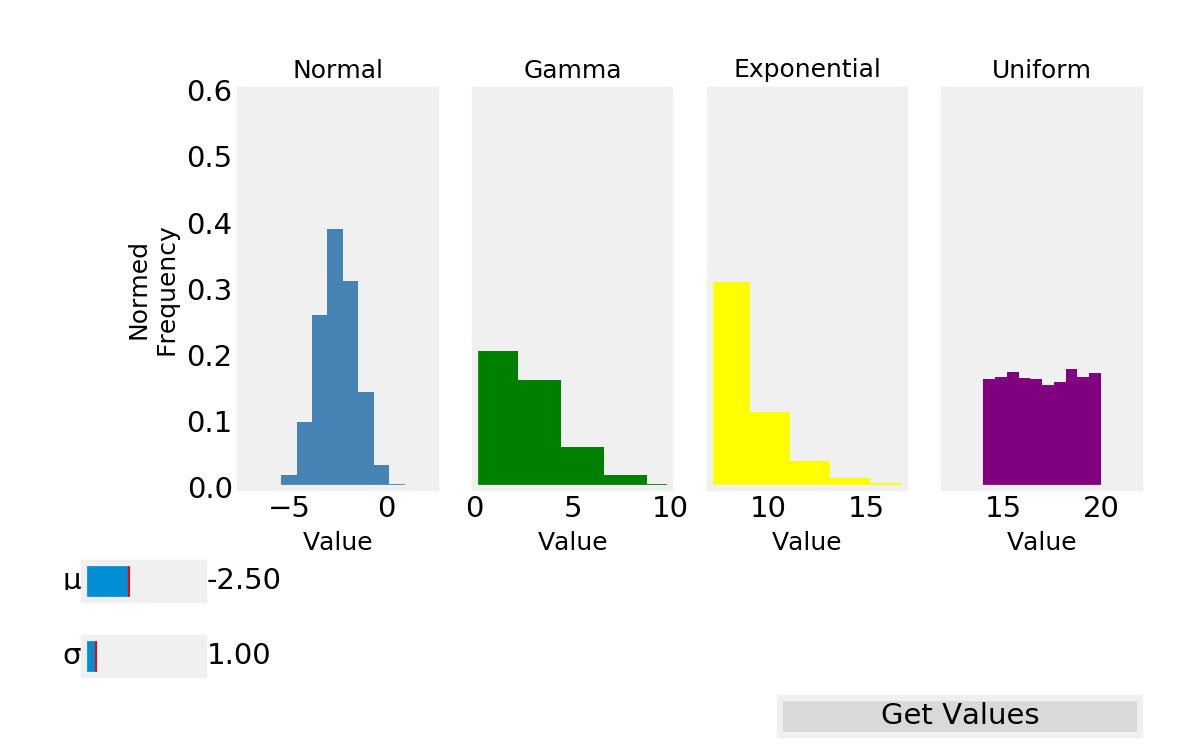

In [2]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

# Creating subplots with 4 columns in a single row sharing y values

plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(8,5)
plt.subplots_adjust(left=0.2,bottom =0.35,hspace =0.4 ) #creating space for slider and button widgets
[ax1, ax2, ax3, ax4]=axs
# fig.suptitle('Understanding Distributions Through Sampling', fontsize=18)
for i in range(len(axs)):   
    axs[i].grid(None)
# plt.tight_layout()


ax_mu_slider =plt.axes([0.07,0.2,0.1,0.05])
mu_slider = Slider(ax_mu_slider,label ="\u03BC",valmin= -10,valmax=10, valinit =-2.5)
mu = mu_slider.val

ax_sigma_slider =plt.axes([0.07,0.1,0.1,0.05])
sigma_slider = Slider(ax_sigma_slider,label = "\u03C3",valmin= 0,valmax=10, valinit =1)
sigma = sigma_slider.val

ax_get_button = plt.axes([0.65,0.02,0.3,0.05])
get_values_button = Button(ax_get_button, label='Get Values',hovercolor ='tomato')

In [3]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    global ns
    x1 = np.random.normal(mu, sigma, 10000)
    x2 = np.random.gamma(2, 1.5, 10000)
    x3 = np.random.exponential(2, 10000)+7
    x4 = np.random.uniform(14,20, 10000)
    x=[x1,x2,x3,x4]
    # check if animation is at the last frame, and if so, stop the animation a
    if curr > n: 
        a.event_source.stop()
#     plt.cla()
#     plt.style.use('fivethirtyeight')
#     fig, axs = plt.subplots(1, 4, sharey=True)
#     fig.set_size_inches(8,5)
#     plt.subplots_adjust(left=0.2,bottom =0.35,hspace =0.4 ) #creating space for slider and button widgets
#     [ax1, ax2, ax3, ax4]=axs
#     bins = np.arange(-4, 4, 0.5)
#     plt.cla()
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:curr],color=color[i], orientation='vertical', histtype='stepfilled', normed=True)
        axs[i].set_title(titles[i], fontsize=12)
        axs[i].set_ylim([0,0.6])
        axs[i].set_xlabel('Value', fontsize=12)
#         axs[i].axis(x_lims1[i])
        axs[i].set_xlim((x_lims[i][0],x_lims[i][1]))
        if i>0:
            axs[i].get_yaxis().set_visible(False)
        else:
            axs[i].set_ylabel('Normed\nFrequency', fontsize=12)
        axs[i].grid(None)

#     fig.suptitle('Understanding Distributions Through Sampling', y=1)
#     plt.tight_layout()
    
    
color=['steelblue','g','yellow','purple']
titles=['Normal','Gamma','Exponential','Uniform']
x_lims = [[-7.5, 2.5],[0, 10],[7, 17],[12, 22]]
# x_lims1 = [[-7.5, 2.5, 0, 0.6],[0, 10, 0, 0.6],[7, 17, 0, 0.6],[12, 22, 0, 0.6]]
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True,figsize=(8,3))
# axs = [ax1,ax2,ax3,ax4]
x=[x1,x2,x3,x4]
n=10000
# a = animation.FuncAnimation(fig, update, frames=np.arange(100,10100,100),repeat=False)
# To run get values after clicking get_values button


def get_values(event):
    global x1
    global x2
    global x3
    global x4
    
    global mu
    global sigma
    global k
    global theta
    global beta
    global low
    global high
    
    x1 = []
    x2 = []
    x3 = []
    x4 = []   
    mu = mu_slider.val
    sigma = sigma_slider.val
    k = k_slider.val
    theta = theta_slider.val
    beta = beta_slider.val
    low = low_slider.val
    high = high_slider.val

a = animation.FuncAnimation(fig, update, frames=np.arange(100,10100,100),  repeat = False)

cid = get_values_button.on_clicked(get_values)

In [4]:
a.save("demo2.mp4")